In [54]:
!pip install sklearn --upgrade

Requirement already up-to-date: sklearn in /Users/Madison/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages (0.0)


In [55]:
import pandas as pd
import numpy as np

In [56]:
pd.read_csv('base_inventory_files/city_mean_pending_weekly_smooth_base.csv', header=None).T.to_csv('transposed_inventory_files/city_mean_pending_weekly_smooth.csv', header=False, index=False)
pd.read_csv('base_inventory_files/city_median_pending_weekly_smooth_base.csv', header=None).T.to_csv('transposed_inventory_files/city_median_pending_weekly_smooth.csv', header=False, index=False)
pd.read_csv('base_inventory_files/city_new_pending_weekly_smooth_base.csv', header=None).T.to_csv('transposed_inventory_files/city_new_pending_weekly_smooth.csv', header=False, index=False)
pd.read_csv('base_inventory_files/city_inventory_weekly_allHomes_smooth_base.csv', header=None).T.to_csv('transposed_inventory_files/city_inventory_weekly_allHomes_smooth.csv', header=False, index=False)
pd.read_csv('base_inventory_files/city_inventory_weekly_SFH_smooth_base.csv', header=None).T.to_csv('transposed_inventory_files/city_inventory_weekly_SFH_smooth.csv', header=False, index=False)

In [57]:
mean_pending = pd.read_csv("transposed_inventory_files/city_mean_pending_weekly_smooth.csv")
median_pending = pd.read_csv("transposed_inventory_files/city_median_pending_weekly_smooth.csv")
new_pending = pd.read_csv("transposed_inventory_files/city_new_pending_weekly_smooth.csv")
inventory_all = pd.read_csv("transposed_inventory_files/city_inventory_weekly_allHomes_smooth.csv")
inventory_SFH = pd.read_csv("transposed_inventory_files/city_inventory_weekly_SFH_smooth.csv")

In [58]:
mean_pending.columns = mean_pending.iloc[1]
mean_pending = mean_pending.drop([0,1,2,3])
mean_pending = mean_pending.rename(columns={"RegionName": "Date"})
mean_pending = mean_pending.reset_index(drop=True)
mean_pending.insert(1, 'Total_Days', "")
x = 0
for index, row in mean_pending.iterrows():
    mean_pending["Total_Days"][index] = x
    x = x + 7
mean_pending

1,Date,Total_Days,United States,"New York, NY","Los Angeles-Long Beach-Anaheim, CA","Chicago, IL","Dallas-Fort Worth, TX","Philadelphia, PA","Houston, TX","Washington, DC",...,"Madison, WI","Lakeland, FL","Ogden, UT","Daytona Beach, FL","Des Moines, IA","Jackson, MS","Augusta, GA","Harrisburg, PA","Provo, UT","Fort Collins, CO"
0,2018-01-06,0,78.0,103.0,50.0,89.0,64.0,86.0,75.0,71.0,...,85.0,53.0,43.0,58.0,67.0,96.0,NaN,79.0,59.0,61.0
1,2018-01-13,7,79.0,106.0,52.0,89.0,64.0,89.0,75.0,74.0,...,82.0,61.0,48.0,65.0,68.0,90.0,NaN,84.0,56.0,69.0
2,2018-01-20,14,79.0,106.0,52.0,87.0,64.0,92.0,77.0,74.0,...,78.0,60.0,50.0,58.0,66.0,93.0,NaN,82.0,50.0,70.0
3,2018-01-27,21,78.0,107.0,50.0,87.0,64.0,91.0,76.0,72.0,...,83.0,70.0,53.0,65.0,71.0,97.0,NaN,83.0,47.0,74.0
4,2018-02-03,28,75.0,104.0,46.0,83.0,62.0,87.0,73.0,73.0,...,77.0,70.0,49.0,73.0,68.0,91.0,NaN,80.0,42.0,71.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,2021-05-29,1239,NaN,NaN,NaN,NaN,NaN,17.0,18.0,NaN,...,NaN,10.0,NaN,19.0,10.0,NaN,14.0,11.0,NaN,41.0
178,2021-06-05,1246,NaN,NaN,NaN,NaN,NaN,17.0,17.0,NaN,...,NaN,9.0,NaN,18.0,11.0,NaN,13.0,11.0,NaN,32.0
179,2021-06-12,1253,NaN,NaN,NaN,NaN,NaN,17.0,17.0,NaN,...,NaN,9.0,NaN,18.0,12.0,NaN,13.0,11.0,NaN,32.0
180,2021-06-19,1260,NaN,NaN,NaN,NaN,NaN,17.0,17.0,NaN,...,NaN,10.0,NaN,19.0,12.0,NaN,12.0,12.0,NaN,28.0


In [59]:
mean_location_df = mean_pending.iloc[:, [1,2]]
mean_location_df = mean_location_df.rename(columns={f"{mean_locations[0]}": "Mean_Pending"})
mean_location_df[["Mean_Pending"]] = mean_location_df[["Mean_Pending"]].apply(pd.to_numeric)
mean_location_df.loc[:,'LastWeek'] = mean_location_df.loc[:,"Mean_Pending"].shift()
mean_location_df.loc[:,'LastWeek_Diff'] = mean_location_df.loc[:,'LastWeek'].diff()
mean_location_df = mean_location_df.dropna()
mean_location_df = mean_location_df.reset_index(drop=True)
mean_location_df

1,Total_Days,Mean_Pending,LastWeek,LastWeek_Diff
0,14,79.0,79.0,1.0
1,21,78.0,79.0,0.0
2,28,75.0,78.0,-1.0
3,35,73.0,75.0,-3.0
4,42,71.0,73.0,-2.0
...,...,...,...,...
150,1064,42.0,40.0,0.0
151,1071,43.0,42.0,2.0
152,1078,44.0,43.0,1.0
153,1085,45.0,44.0,1.0


In [60]:
X = mean_location_df[:].drop(['Mean_Pending'], axis = 1)
y = mean_location_df["Mean_Pending"]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=57)

In [61]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [62]:
print(f"Training Data Score: {model.score(X_train, y_train)}")
print(f"Testing Data Score: {model.score(X_test, y_test)}")

Training Data Score: 0.9903519864822314
Testing Data Score: 0.9899705269635991


In [63]:
r = len(mean_location_df.index)
r = r - 1
#running for 2 years of data
for i in range(0,25):
    LastWeekValue = mean_location_df["Mean_Pending"][r]
    TotalDaysValue = mean_location_df["Total_Days"][r] + 7
    DifferenceValue = mean_location_df["Mean_Pending"][r] - mean_location_df["LastWeek"][r]
    NewX = [[TotalDaysValue, LastWeekValue, DifferenceValue]]
    predicted_value = model.predict(NewX)
    predicted_number = str(predicted_value).lstrip('[').rstrip(']')
    predicted_pending = float(predicted_number)
    new_row = {'Total_Days': TotalDaysValue, 'Mean_Pending': predicted_pending, 'LastWeek': LastWeekValue, 'LastWeek_Diff': DifferenceValue}
    mean_location_df = mean_location_df.append(new_row, ignore_index = True)
    r = r + 1
    i = i + 1


In [64]:
mean_location_df

1,Total_Days,Mean_Pending,LastWeek,LastWeek_Diff
0,14,79.000000,79.000000,1.000000
1,21,78.000000,79.000000,0.000000
2,28,75.000000,78.000000,-1.000000
3,35,73.000000,75.000000,-3.000000
4,42,71.000000,73.000000,-2.000000
...,...,...,...,...
175,1239,57.834987,57.889262,-0.050835
176,1246,57.780140,57.834987,-0.054275
177,1253,57.726893,57.780140,-0.054847
178,1260,57.676824,57.726893,-0.053248


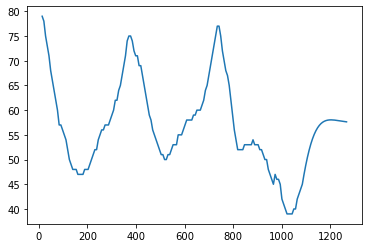

In [65]:
import matplotlib.pyplot as plt
plt.plot(mean_location_df["Total_Days"], mean_location_df["Mean_Pending"])